In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from scipy.stats import *




In [7]:


df_train=pd.read_csv("/csv water dataset-1.csv")
df_test=pd.read_csv("/csv water dataset-2 test.csv")
#
print("Train:",len(df_train))
sample_sub=pd.read_csv("/sample submition-3.csv")
#

df_train.head()


Train: 1048575


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [8]:
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1048575 non-null  int64  
 1   MonsoonIntensity                 1048575 non-null  int64  
 2   TopographyDrainage               1048575 non-null  int64  
 3   RiverManagement                  1048575 non-null  int64  
 4   Deforestation                    1048575 non-null  int64  
 5   Urbanization                     1048575 non-null  int64  
 6   ClimateChange                    1048575 non-null  int64  
 7   DamsQuality                      1048575 non-null  int64  
 8   Siltation                        1048575 non-null  int64  
 9   AgriculturalPractices            1048575 non-null  int64  
 10  Encroachments                    1048575 non-null  int64  
 11  IneffectiveDisasterPreparedness  1048575 non-null 

In [9]:
df_train.describe()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.921994e+00,4.926551e+00,4.954775e+00,4.942264e+00,4.942944e+00,4.934179e+00,4.955646e+00,4.926949e+00,4.942641e+00,...,4.947253e+00,4.954061e+00,4.930763e+00,4.928908e+00,4.926186e+00,4.927963e+00,4.950330e+00,4.940667e+00,4.939322e+00,5.044697e-01
std,3.026977e+05,2.056183e+00,2.093638e+00,2.071778e+00,2.051735e+00,2.083140e+00,2.057920e+00,2.082146e+00,2.065527e+00,2.067986e+00,...,2.072499e+00,2.089066e+00,2.077774e+00,2.082354e+00,2.064532e+00,2.074506e+00,2.068883e+00,2.081685e+00,2.090317e+00,5.103092e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.621435e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.242870e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,7.864305e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.048574e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.800000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [10]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()

def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat],
                   order=df_train[cat].value_counts(ascending=False).index);

    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)


<Figure size 2500x1200 with 0 Axes>

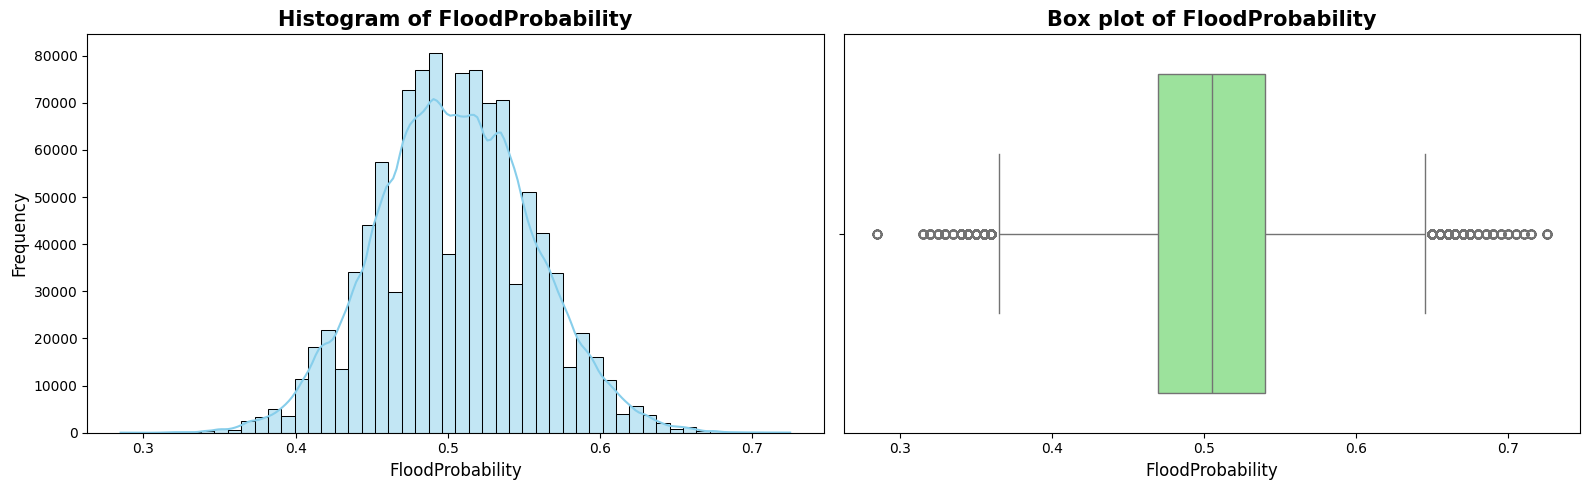

In [11]:
plt.figure(figsize=(25, 12))
plot_numerics(df_train[['FloodProbability']])


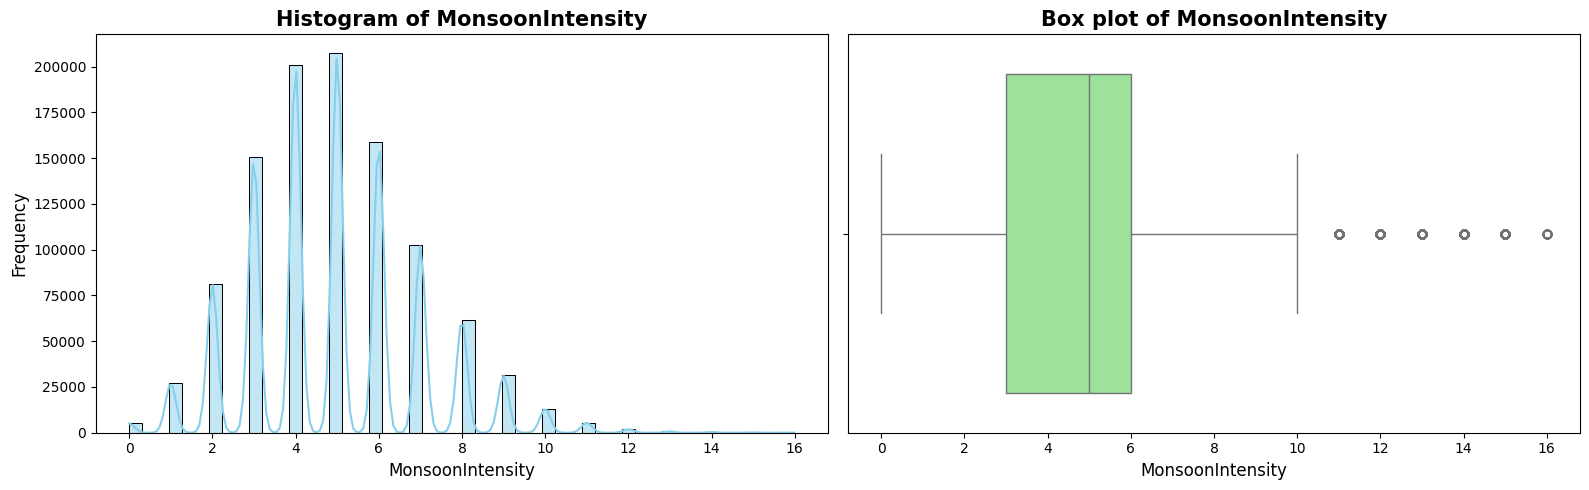

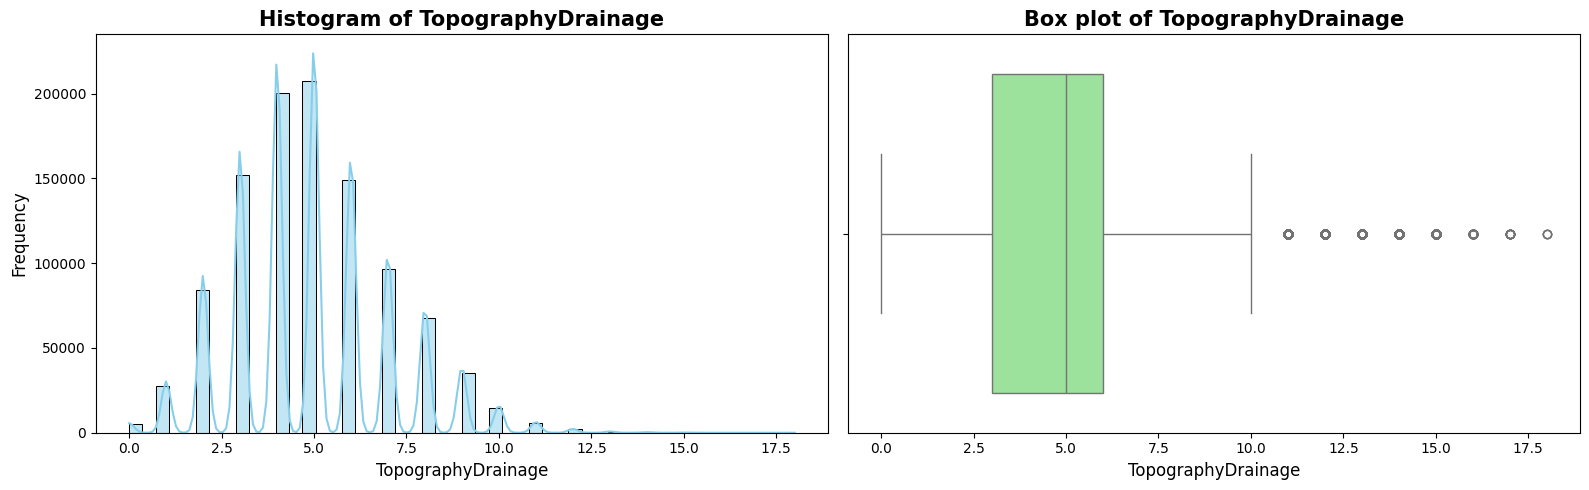

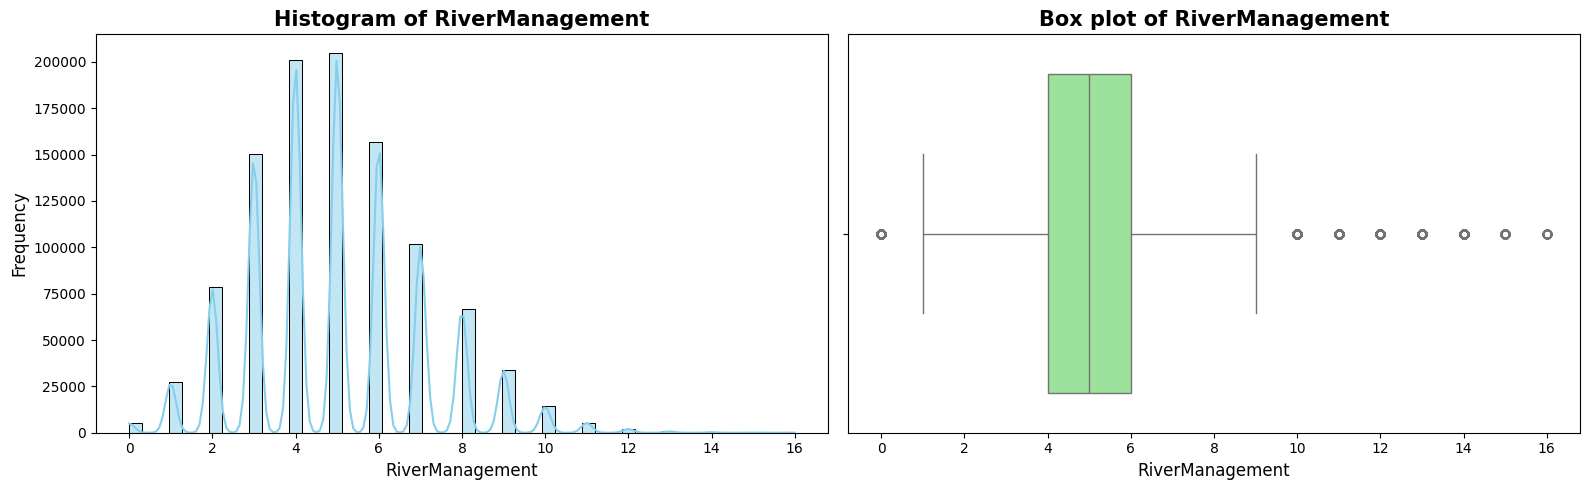

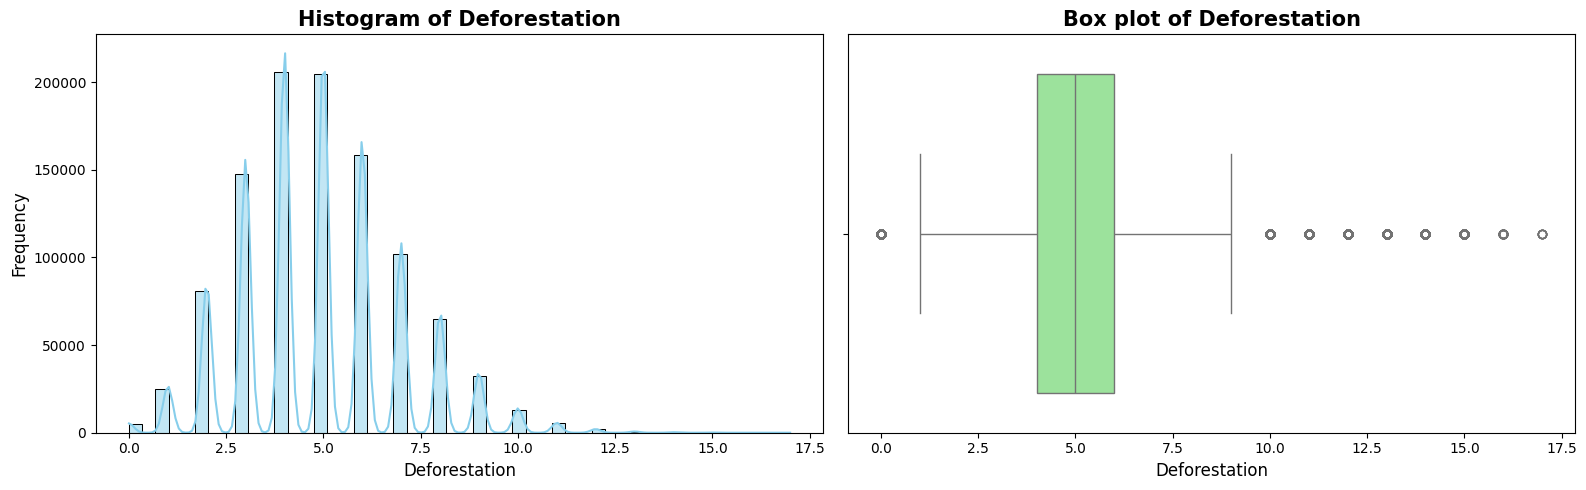

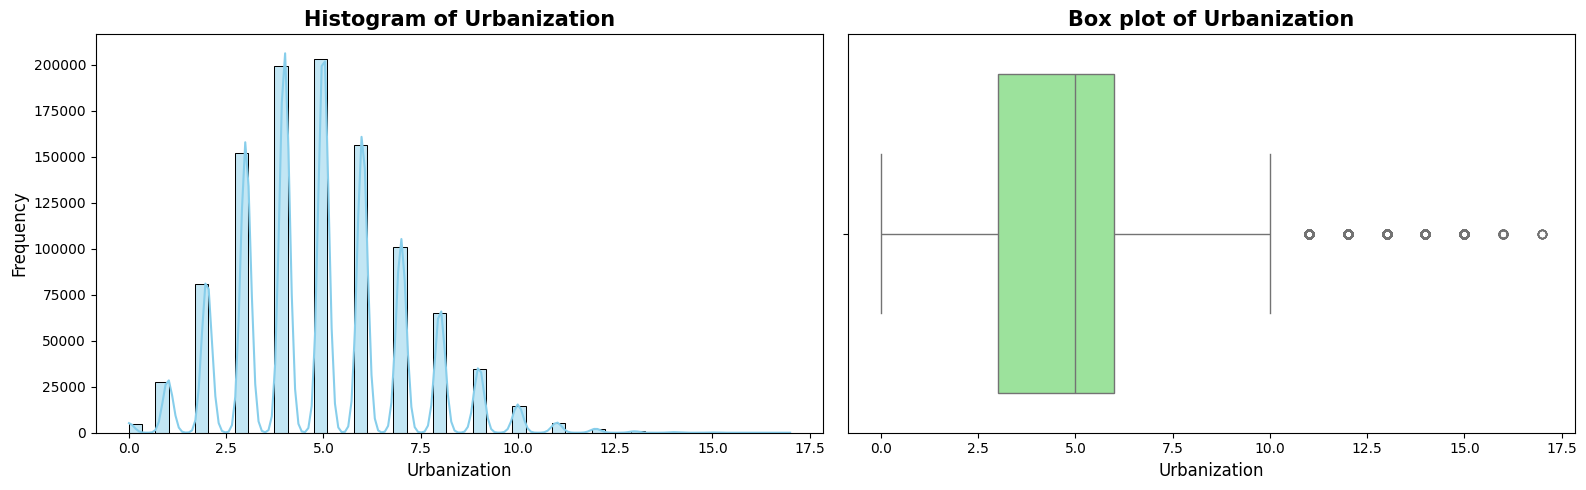

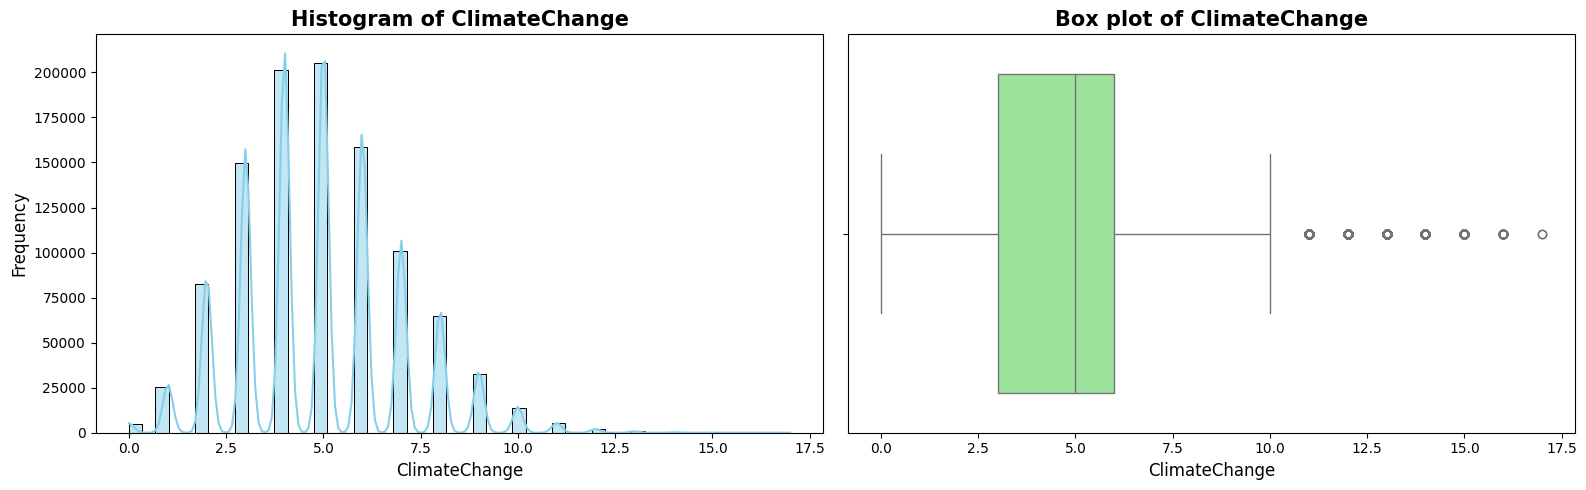

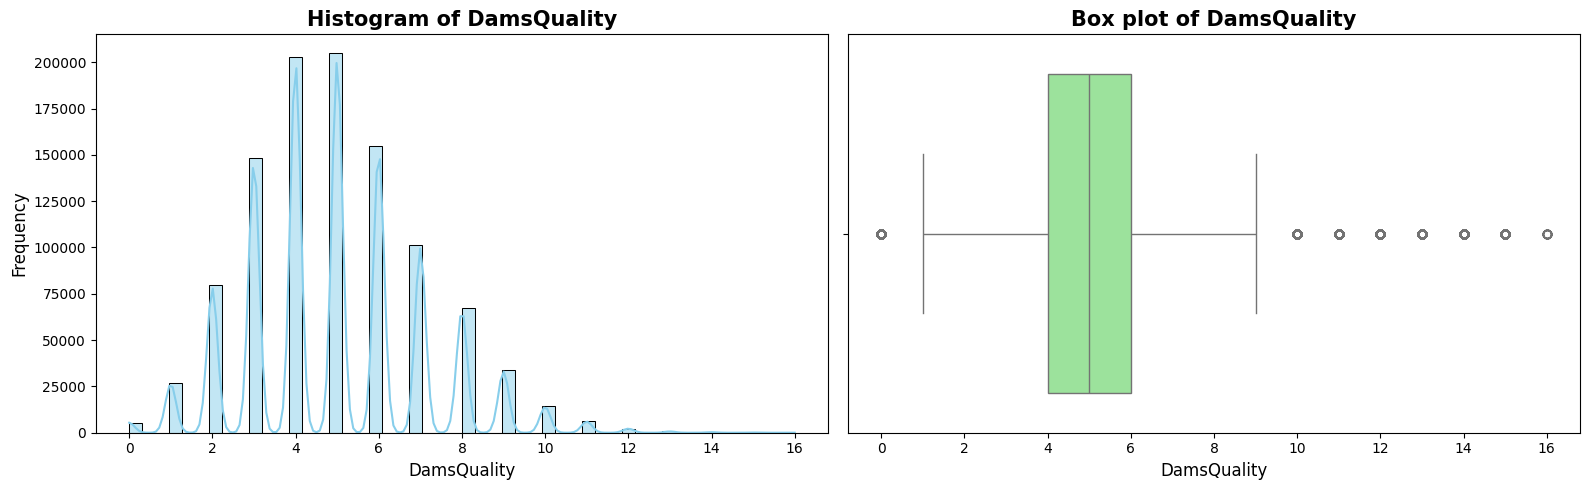

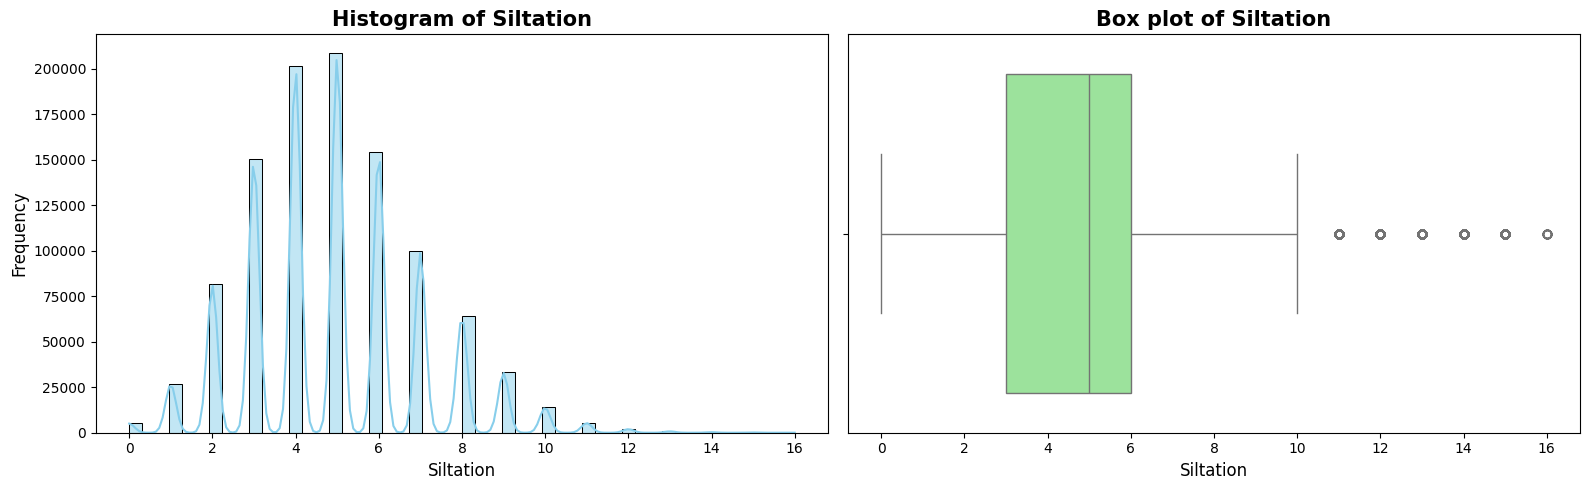

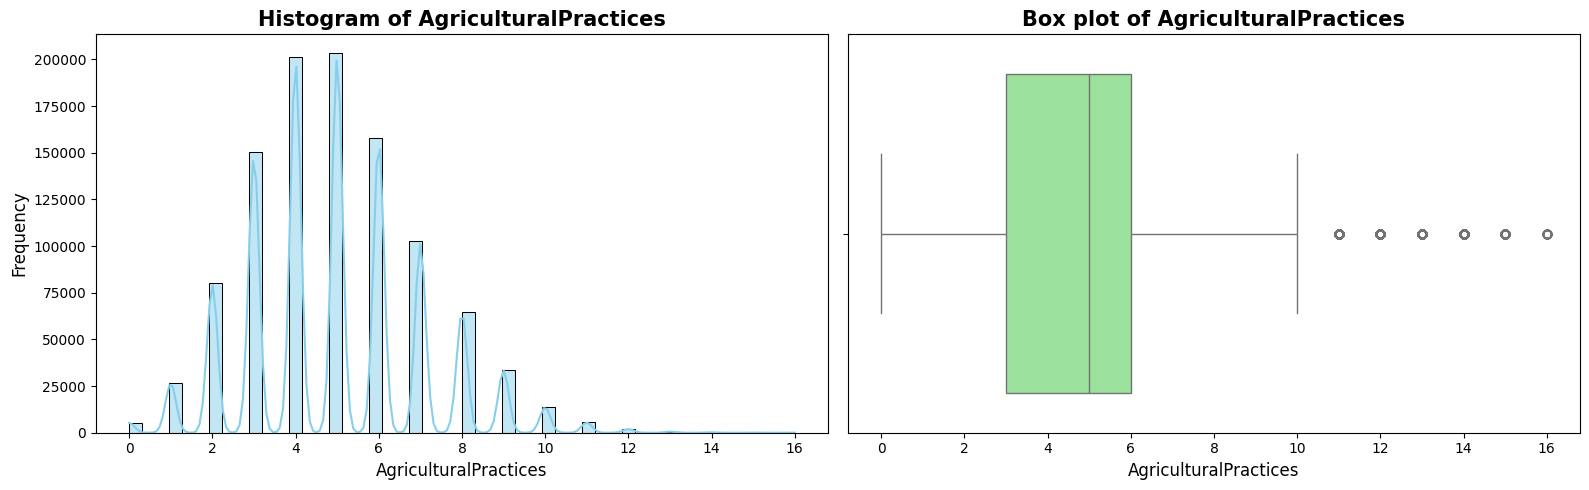

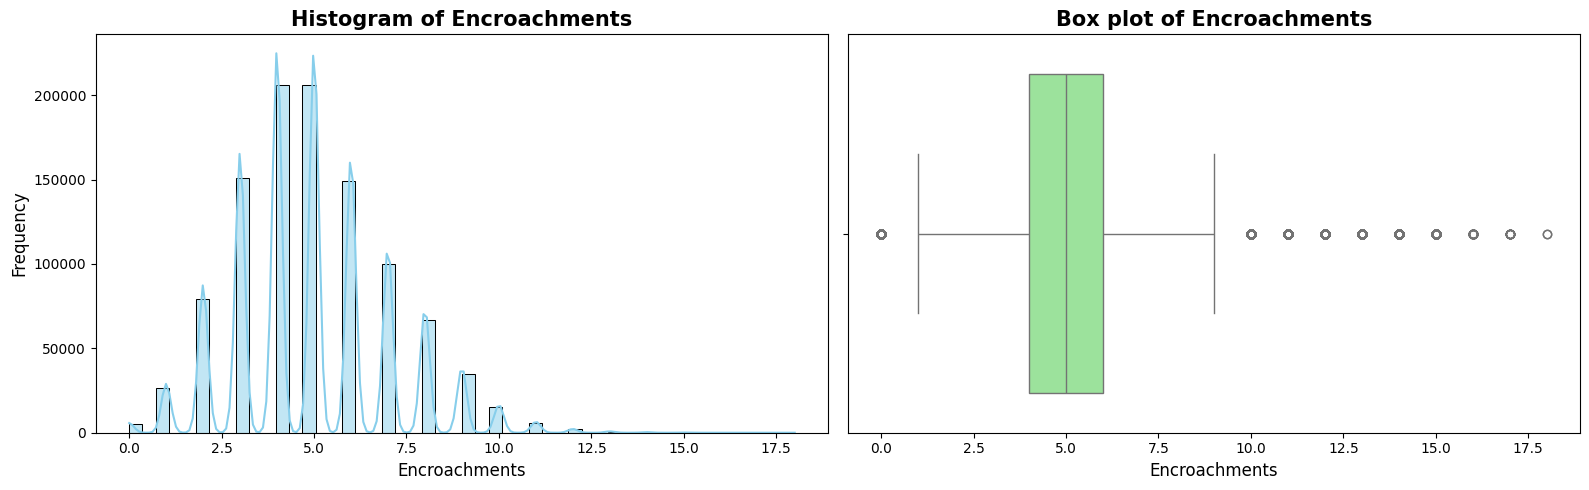

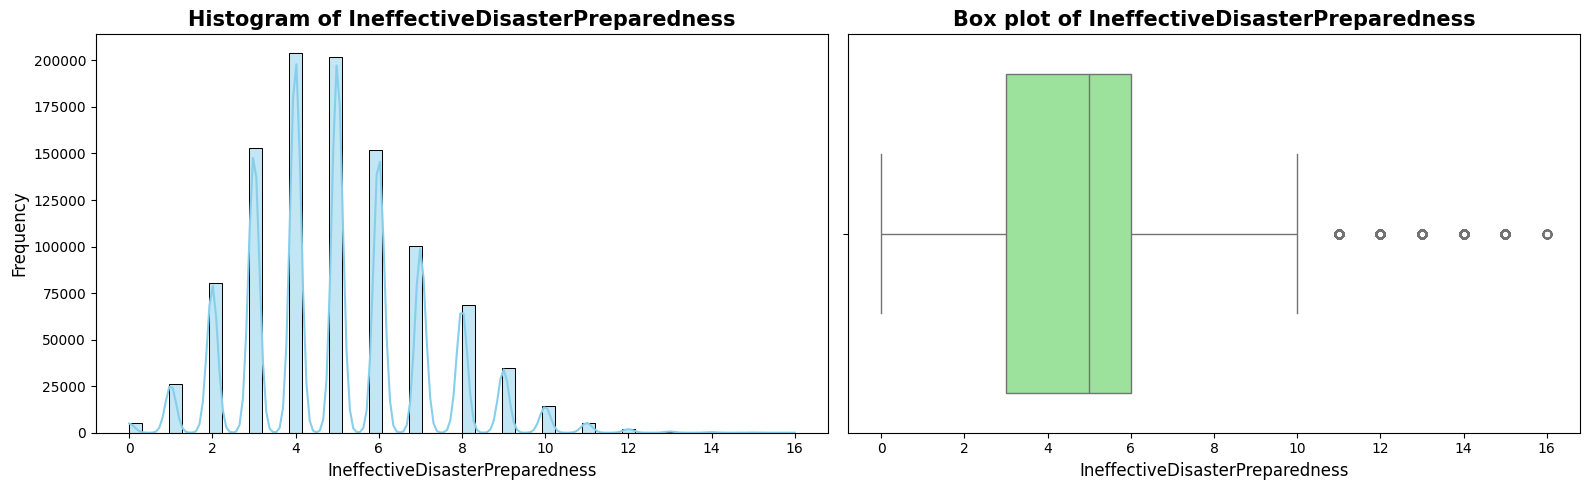

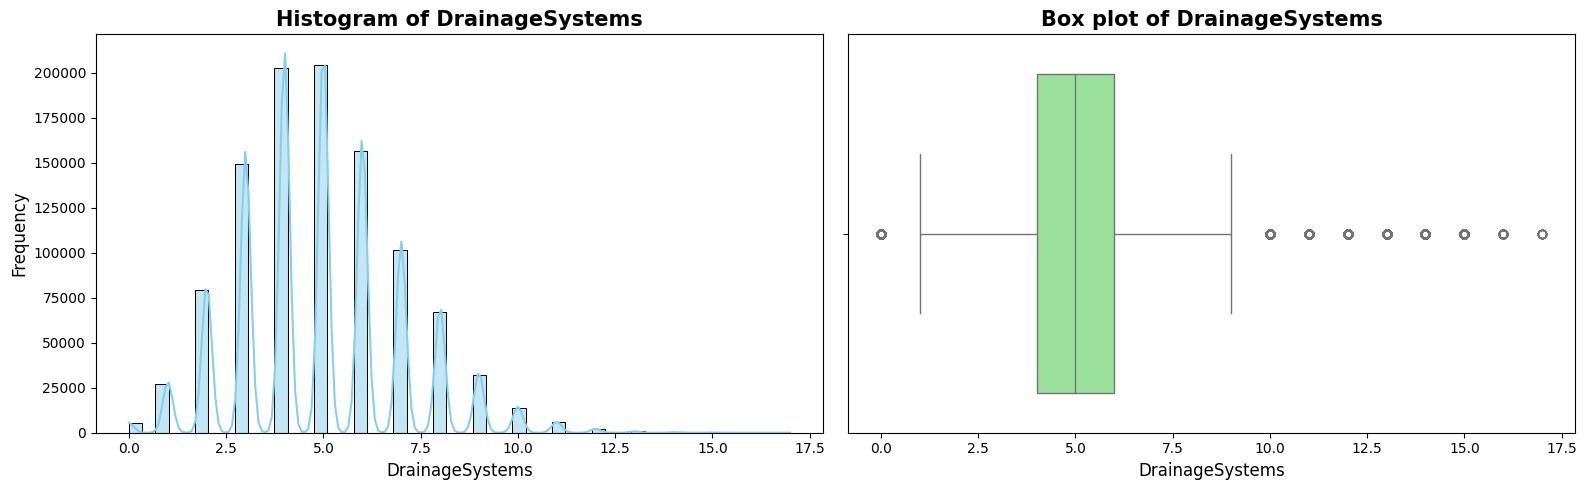

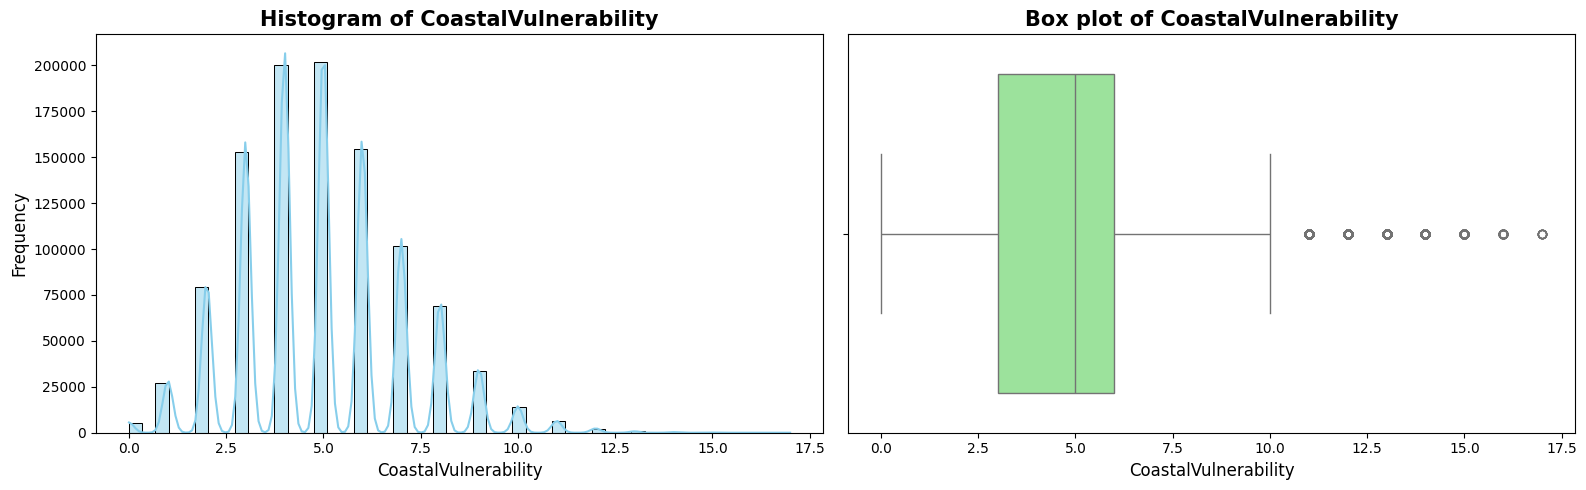

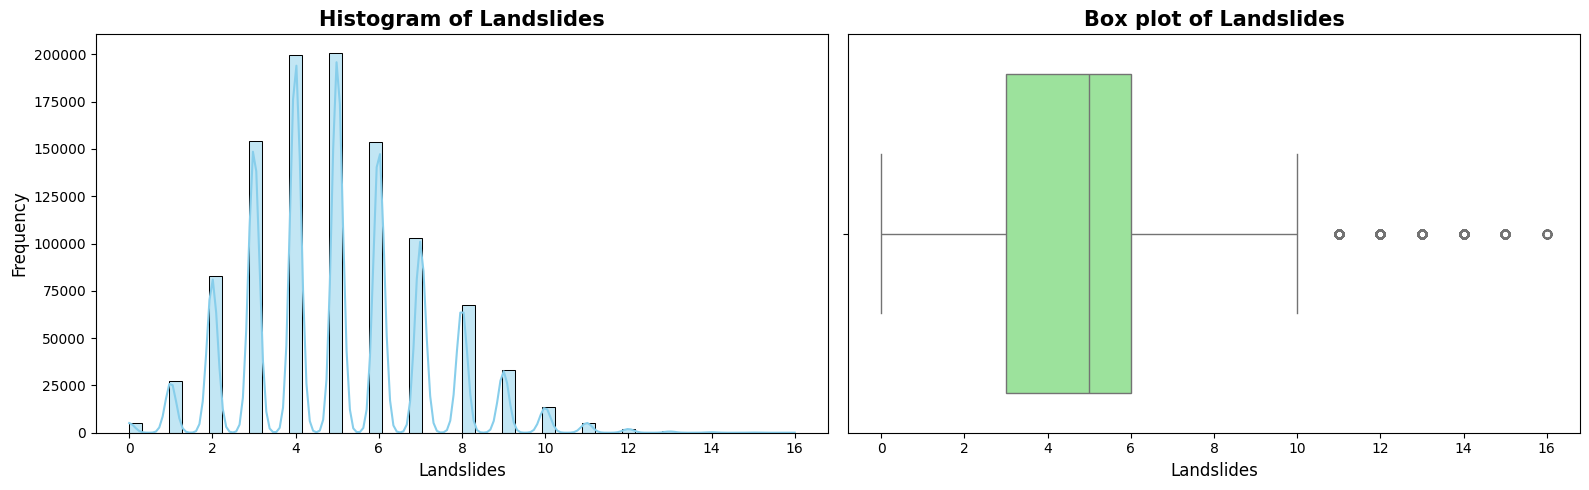

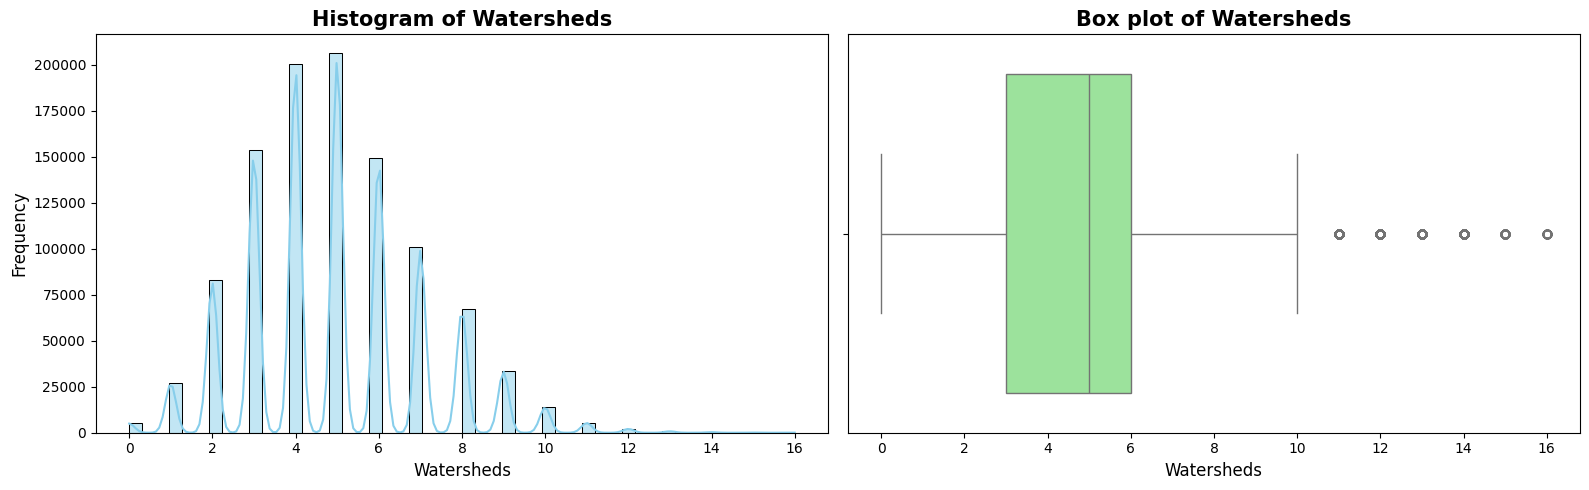

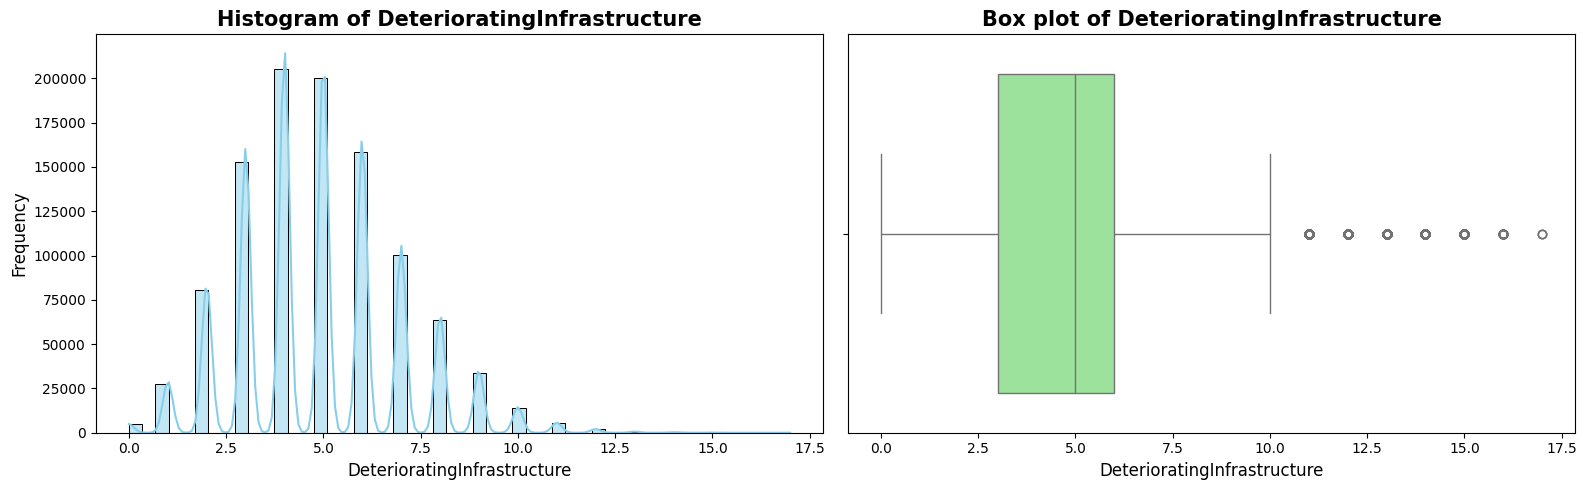

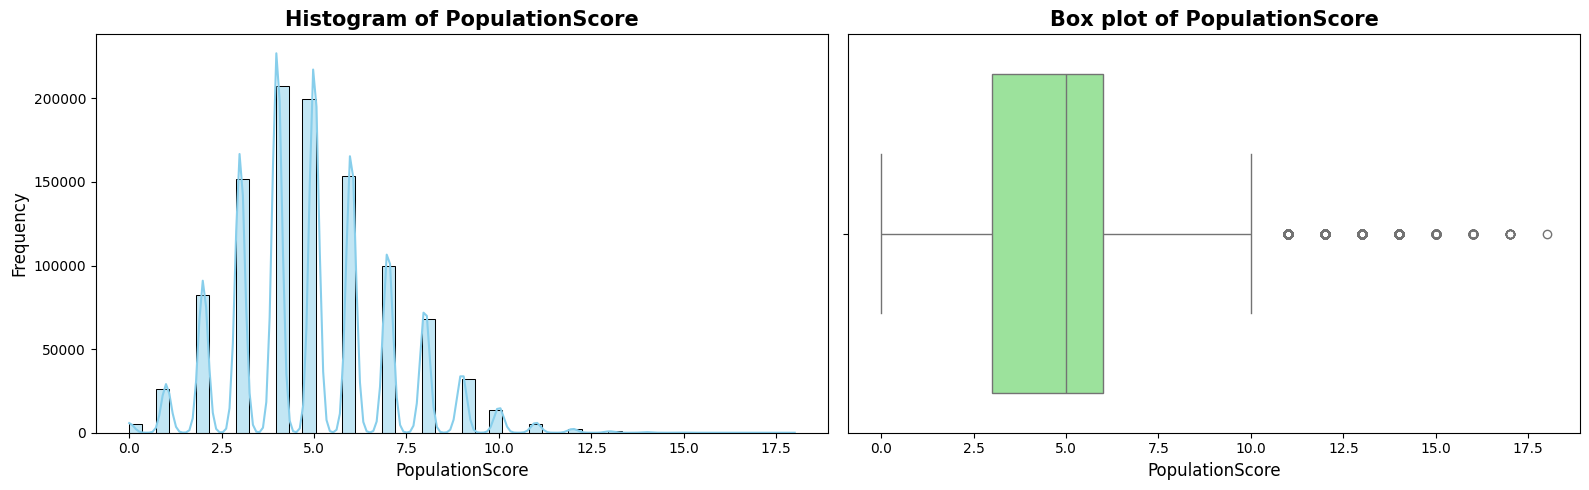

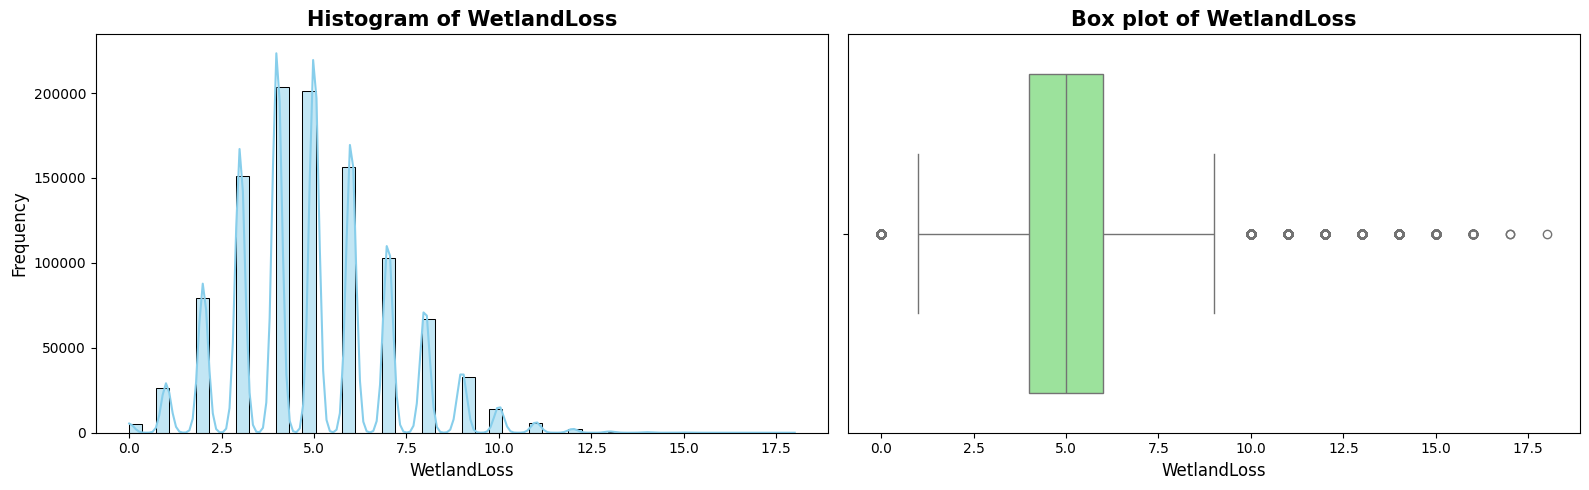

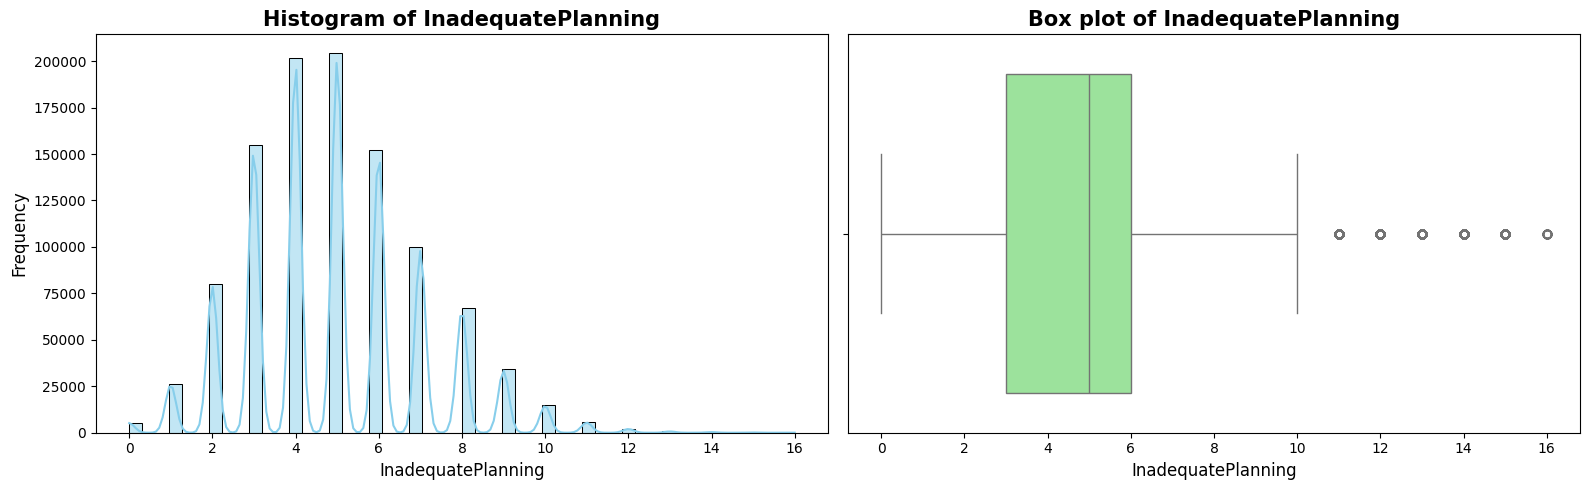

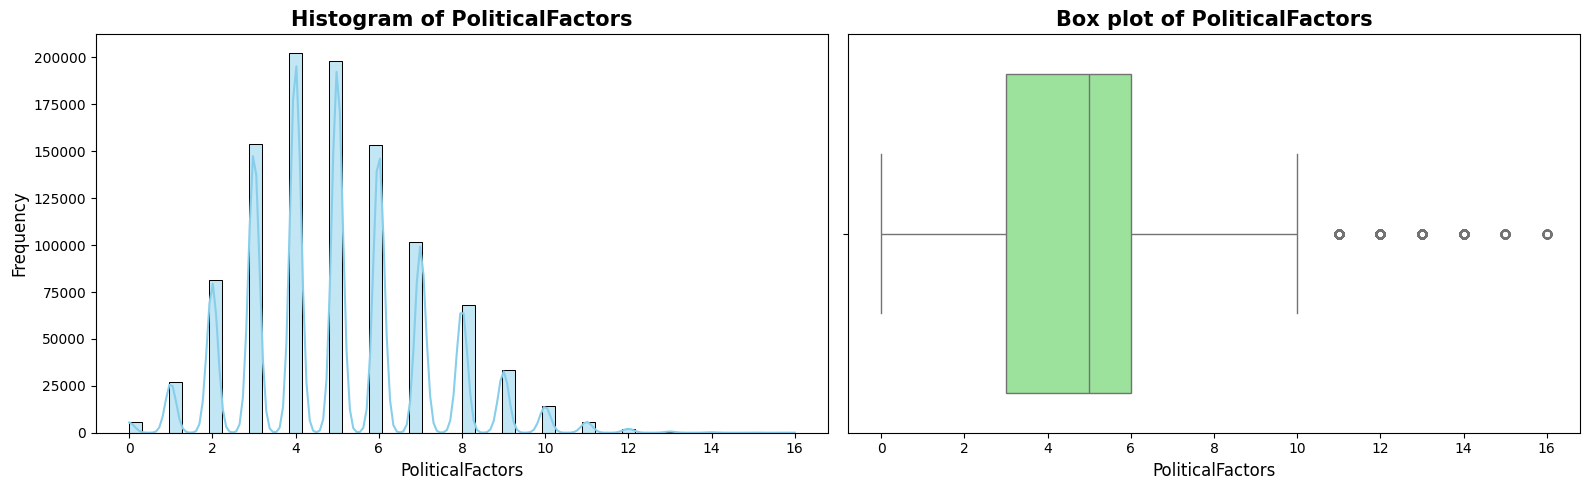

In [12]:
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
plot_numerics(df_train[num_cols])


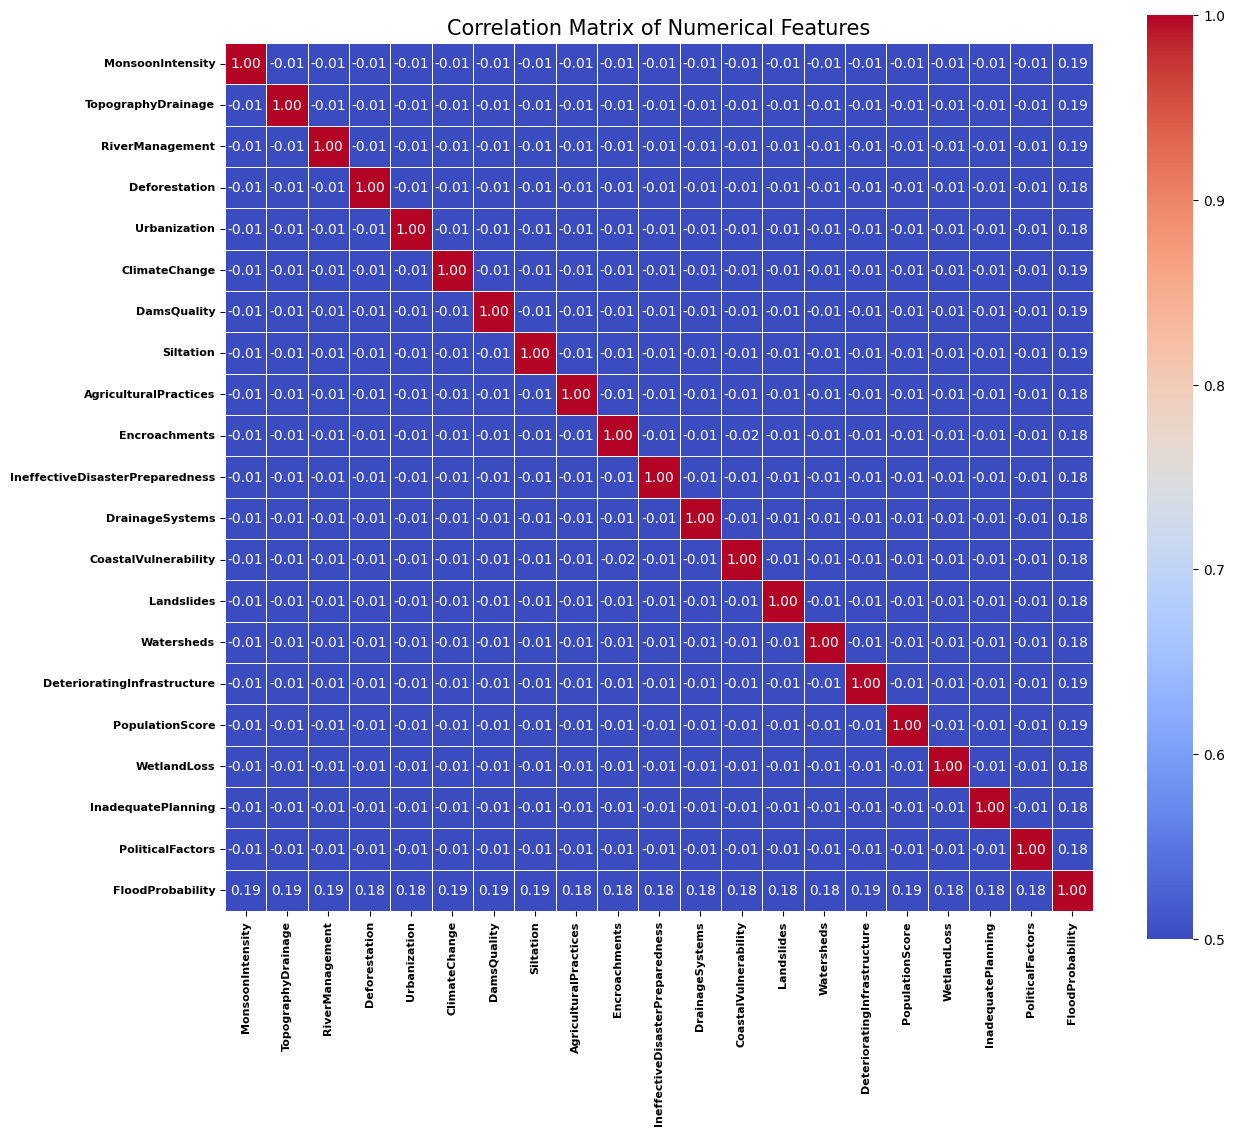

In [13]:

corr_matrix = df_train[num_cols+['FloodProbability']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True,
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()


In [14]:
unique_vals = []
for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())

unique_vals = list(set(unique_vals))
#
def getFeats(df):

    scaler = StandardScaler()

    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity'] + df['ClimateChange']) * (df['Deforestation'] + df['Urbanization'] + df['AgriculturalPractices'] + df['Encroachments'])
    df['InfrastructurePreventionInteraction'] = (df['DamsQuality'] + df['DrainageSystems'] + df['DeterioratingInfrastructure']) * (df['RiverManagement'] + df['IneffectiveDisasterPreparedness'] + df['InadequatePlanning'])

    df['sum'] = df[num_cols].sum(axis=1)
    df['std']  = df[num_cols].std(axis=1)
    df['mean'] = df[num_cols].mean(axis=1)
    df['max']  = df[num_cols].max(axis=1)
    df['min']  = df[num_cols].min(axis=1)
    df['mode'] = df[num_cols].mode(axis=1)[0]
    df['median'] = df[num_cols].median(axis=1)
    df['skew'] = df[num_cols].skew(axis=1)
    df['kurt'] = df[num_cols].kurt(axis=1)

    for i in range(10,100,10):
        df[f'{i}th'] = df[num_cols].quantile(i/100, axis=1)

    df['harmonic'] = len(num_cols) / df[num_cols].apply(lambda x: (1/x).mean(), axis=1)
    df['geometric'] = df[num_cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    df['zscore'] = df[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
    df['cv'] = df['std'] / df['mean']
    df['Skewness_75'] = (df[num_cols].quantile(0.75, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['Skewness_25'] = (df[num_cols].quantile(0.25, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['2ndMoment'] = df[num_cols].apply(lambda x: (x**2).mean(), axis=1)
    df['3rdMoment'] = df[num_cols].apply(lambda x: (x**3).mean(), axis=1)
    df['entropy'] = df[num_cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)

    for v in unique_vals:
        if v<16:
            df['cnt_{}'.format(v)] = (df[num_cols] == v).sum(axis=1)

    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

df_train['typ']=0
df_test['typ']=1
#
df_all=pd.concat([df_train,df_test],axis=0)
df_all=getFeats(df_all)
df_all.head()
df_train=df_all[df_all['typ']==0]
df_test=df_all[df_all['typ']==1]
#
X=df_train.drop(['id','FloodProbability','typ'],axis=1)
y=df_train['FloodProbability']
#
feats=list(X.columns)


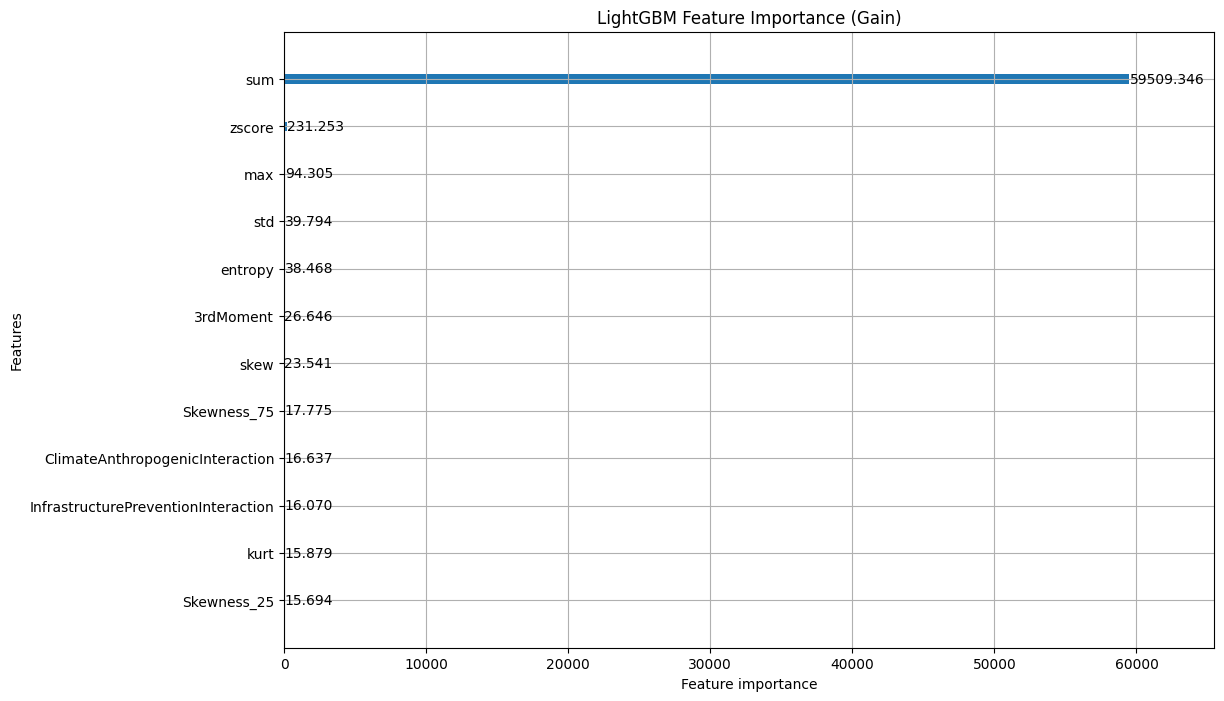

In [15]:
params={'verbosity':-1,'n_estimators': 550, 'learning_rate': 0.02, 'num_leaves':250,'max_depth':10}
LGB=lgb.LGBMRegressor(**params)
LGB.fit(X,y)
#
lgb.plot_importance(LGB, importance_type="gain", figsize=(12,8), max_num_features=12,
                    title="LightGBM Feature Importance (Gain)")
plt.show()


In [16]:
def cross_val_train(X,y,df_test,params):

    spl=5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores, train_scores = [],[]

    cv = KFold(spl, shuffle=True, random_state=42)

    for fold, (train_ind, valid_ind) in enumerate(cv.split(X,y)):

        X_train = X.iloc[train_ind]
        y_train = y[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y[valid_ind]

        model = lgb.LGBMRegressor(boosting_type = 'gbdt',
                                   n_estimators=2000,
                                   learning_rate =  0.012,
                                   device='gpu',
                                   num_leaves = 250,
                                   subsample_for_bin= 165700,
                                   min_child_samples= 114,
                                   reg_alpha= 2.075e-06,
                                   reg_lambda= 3.839e-07,
                                   colsample_bytree= 0.9634,
                                   subsample= 0.9592,
                                   max_depth= 10,
                                   random_state=0,
                                  verbosity=-1
                                 )
        model.fit(X_train, y_train,
                    eval_set=[(X_val, y_val)],
                    callbacks=[lgb.early_stopping(stopping_rounds=70), lgb.log_evaluation(100)])

        y_pred_trn=model.predict(X_train)
        y_pred_val=model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print("Fold:",fold, " Train R2:",np.round(train_r2,5), " Val R2:",np.round(val_r2,5))

        test_preds += model.predict(df_test[feats])/spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-"*50)

    return val_scores, val_preds, test_preds



In [18]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import lightgbm as lgb

# 1. Read the source files (make sure the correct file paths are provided)
df_train = pd.read_csv("/csv water dataset-1.csv")  # Replace with your actual path
df_test = pd.read_csv("/csv water dataset-2 test.csv")    # Replace with your actual path
sample_sub = pd.read_csv("/sample submition-3.csv")  # Replace with your actual path

print("Train dataset length:", len(df_train))
print("Test dataset length:", len(df_test))
df_train.head()

# 2. Feature Engineering
num_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
            'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
            'Siltation', 'AgriculturalPractices', 'Encroachments',
            'IneffectiveDisasterPreparedness', 'DrainageSystems',
            'CoastalVulnerability', 'Landslides', 'Watersheds',
            'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
            'InadequatePlanning', 'PoliticalFactors']

# Define unique values for feature engineering purposes
unique_vals = []
for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())
unique_vals = list(set(unique_vals))

# Define a function for feature engineering
def getFeats(df):
    scaler = StandardScaler()

    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity'] + df['ClimateChange']) * \
                                            (df['Deforestation'] + df['Urbanization'] + df['AgriculturalPractices'] + df['Encroachments'])
    df['InfrastructurePreventionInteraction'] = (df['DamsQuality'] + df['DrainageSystems'] + df['DeterioratingInfrastructure']) * \
                                                (df['RiverManagement'] + df['IneffectiveDisasterPreparedness'] + df['InadequatePlanning'])

    df['sum'] = df[num_cols].sum(axis=1)
    df['std']  = df[num_cols].std(axis=1)
    df['mean'] = df[num_cols].mean(axis=1)
    df['max']  = df[num_cols].max(axis=1)
    df['min']  = df[num_cols].min(axis=1)
    df['mode'] = df[num_cols].mode(axis=1)[0]
    df['median'] = df[num_cols].median(axis=1)
    df['skew'] = df[num_cols].skew(axis=1)
    df['kurt'] = df[num_cols].kurt(axis=1)

    for i in range(10, 100, 10):
        df[f'{i}th'] = df[num_cols].quantile(i/100, axis=1)

    df['harmonic'] = len(num_cols) / df[num_cols].apply(lambda x: (1/x).mean(), axis=1)
    df['geometric'] = df[num_cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    df['zscore'] = df[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
    df['cv'] = df['std'] / df['mean']
    df['Skewness_75'] = (df[num_cols].quantile(0.75, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['Skewness_25'] = (df[num_cols].quantile(0.25, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['2ndMoment'] = df[num_cols].apply(lambda x: (x**2).mean(), axis=1)
    df['3rdMoment'] = df[num_cols].apply(lambda x: (x**3).mean(), axis=1)
    df['entropy'] = df[num_cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)

    for v in unique_vals:
        if v < 16:
            df[f'cnt_{v}'] = (df[num_cols] == v).sum(axis=1)

    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

# 3. Perform feature engineering on the combined dataset
df_train['typ'] = 0
df_test['typ'] = 1
df_all = pd.concat([df_train, df_test], axis=0)
df_all = getFeats(df_all)

# Split back the datasets
df_train = df_all[df_all['typ'] == 0]
df_test = df_all[df_all['typ'] == 1]

# 4. Define X (features) and y (target) correctly
X = df_train.drop(['id', 'FloodProbability', 'typ'], axis=1)
y = df_train['FloodProbability']

# Extract the feature list for test predictions
feats = list(X.columns)

# 5. Cross-Validation and Model Training Function
# Corrected cross_val_train function to use CPU instead of GPU
def cross_val_train(X, y, df_test, params):

    spl = 5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores = []

    cv = KFold(n_splits=spl, shuffle=True, random_state=42)

    for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):

        X_train = X.iloc[train_ind]
        y_train = y.iloc[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y.iloc[valid_ind]

        # Removed the device='gpu' parameter
        model = lgb.LGBMRegressor(boosting_type='gbdt',
                                   n_estimators=2000,
                                   learning_rate=0.012,
                                   num_leaves=250,
                                   subsample_for_bin=165700,
                                   min_child_samples=114,
                                   reg_alpha=2.075e-06,
                                   reg_lambda=3.839e-07,
                                   colsample_bytree=0.9634,
                                   subsample=0.9592,
                                   max_depth=10,
                                   random_state=0,
                                   verbosity=-1
                                 )
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[lgb.early_stopping(stopping_rounds=70), lgb.log_evaluation(100)])

        y_pred_trn = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train R2: {np.round(train_r2, 5)}, Val R2: {np.round(val_r2, 5)}")

        test_preds += model.predict(df_test[feats]) / spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-" * 50)

    return val_scores, val_preds, test_preds

# Call the function again to train the model using CPU
val_scores, val_preds, test_preds = cross_val_train(X, y, df_test, params)



Train dataset length: 1048575
Test dataset length: 745305
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000544015
[200]	valid_0's l2: 0.000359508
[300]	valid_0's l2: 0.000342661
[400]	valid_0's l2: 0.000340977
[500]	valid_0's l2: 0.000340797
[600]	valid_0's l2: 0.000340788
[700]	valid_0's l2: 0.000340792
Early stopping, best iteration is:
[635]	valid_0's l2: 0.000340785
Fold: 0, Train R2: 0.87343, Val R2: 0.86889
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000543578
[200]	valid_0's l2: 0.000358463
[300]	valid_0's l2: 0.000341761
[400]	valid_0's l2: 0.000340168
[500]	valid_0's l2: 0.000340003
[600]	valid_0's l2: 0.000340007
Early stopping, best iteration is:
[559]	valid_0's l2: 0.000339998
Fold: 1, Train R2: 0.87301, Val R2: 0.86974
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2:

In [17]:
# Corrected cross_val_train function to use CPU instead of GPU
def cross_val_train(X, y, df_test, params):

    spl = 5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores = []

    cv = KFold(n_splits=spl, shuffle=True, random_state=42)

    for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):

        X_train = X.iloc[train_ind]
        y_train = y.iloc[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y.iloc[valid_ind]

        # Removed the device='gpu' parameter
        model = lgb.LGBMRegressor(boosting_type='gbdt',
                                   n_estimators=2000,
                                   learning_rate=0.012,
                                   num_leaves=250,
                                   subsample_for_bin=165700,
                                   min_child_samples=114,
                                   reg_alpha=2.075e-06,
                                   reg_lambda=3.839e-07,
                                   colsample_bytree=0.9634,
                                   subsample=0.9592,
                                   max_depth=10,
                                   random_state=0,
                                   verbosity=-1
                                 )
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[lgb.early_stopping(stopping_rounds=70), lgb.log_evaluation(100)])

        y_pred_trn = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print(f"Fold: {fold}, Train R2: {np.round(train_r2, 5)}, Val R2: {np.round(val_r2, 5)}")

        test_preds += model.predict(df_test[feats]) / spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-" * 50)

    return val_scores, val_preds, test_preds

# Call the function again to train the model using CPU
val_scores, val_preds, test_preds = cross_val_train(X, y, df_test, params)


Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000544015
[200]	valid_0's l2: 0.000359508
[300]	valid_0's l2: 0.000342661
[400]	valid_0's l2: 0.000340977
[500]	valid_0's l2: 0.000340797
[600]	valid_0's l2: 0.000340788
[700]	valid_0's l2: 0.000340792
Early stopping, best iteration is:
[635]	valid_0's l2: 0.000340785
Fold: 0, Train R2: 0.87343, Val R2: 0.86889
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000543578
[200]	valid_0's l2: 0.000358463
[300]	valid_0's l2: 0.000341761
[400]	valid_0's l2: 0.000340168
[500]	valid_0's l2: 0.000340003
[600]	valid_0's l2: 0.000340007
Early stopping, best iteration is:
[559]	valid_0's l2: 0.000339998
Fold: 1, Train R2: 0.87301, Val R2: 0.86974
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000544583
[200]	valid_0's l2: 0.000360421
[300]	valid_0